In [116]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
import cmath as cm
import math as m
warnings.filterwarnings('ignore')
from mpl_toolkits.mplot3d import axes3d
import sympy as sp
from sympy import *
from scipy import signal as sg
from __future__ import division
from mpl_toolkits import mplot3d 
from numpy import sin,cos,pi,exp
import signal

import pylab

In [221]:
def convolution(inputSeq, impulseResponse):
    inputSeq = np.array(inputSeq)
    impulseResponse = np.array(impulseResponse)
    n1=len(inputSeq)
    n2=len(impulseResponse)
    outputSeq=[]
    
    for n in range(n1+n2-1):
        summ=0
        for k in range(n1):
            if n-k>=0 and n-k<=n2-1:
                summ+= inputSeq[k]*impulseResponse[n-k]
        outputSeq=np.append(outputSeq,summ)
    return outputSeq


# Z TRANSFORM

Consider the discrete time sequence x[n] = z
n with −∞ < n < ∞ where
z ∈ C.. Let z = 0.95, z = 1.05, z = −1.05, z = −0.97, z = 1, z = −1.
Now plot the sequences for different values of z. For each plot what is the
nature of the plot?

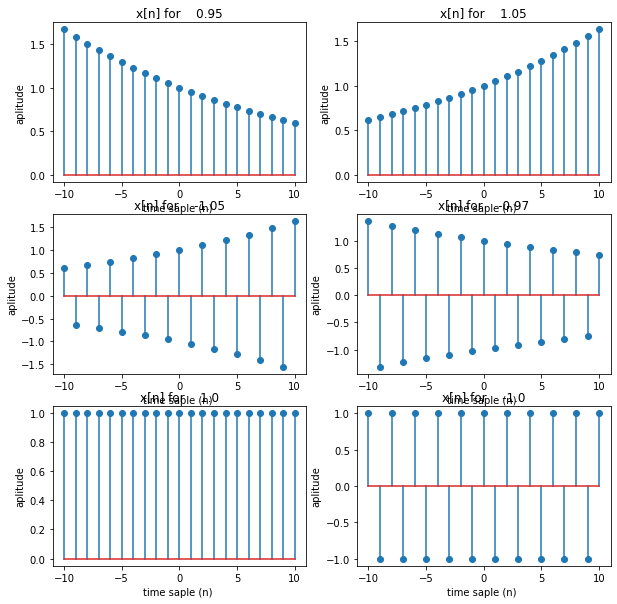

In [5]:
plt.figure(figsize=(10,10))
n=np.linspace(-10,10,21)
z=np.array([0.95,1.05,-1.05,-0.97,1,-1])
out=np.zeros(len(z))
for i in range(len(z)):
    plt.subplot(3,2,i+1)
    out=z[i]**n
    plt.stem(n,out)
    plt.xlabel("time saple (n) ")
    plt.ylabel("aplitude")
    plt.title("x[n] for    "+ str(z[i]))
    

Now consider the same sequence with complex values of z. Consider z =
−2 + 3j, z = 2 − 3j, z = e
jπ/10
, z = 0.95e
jπ/10
, z = 1.05e
jπ/10. For these
values of z create 3D plot with both real and imaginary parts. Try using
different markers for real and imaginary parts.


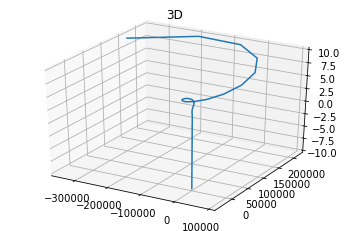

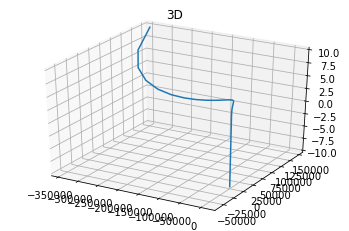

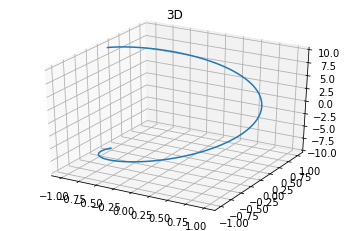

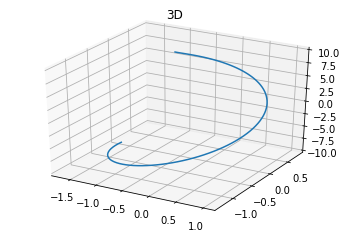

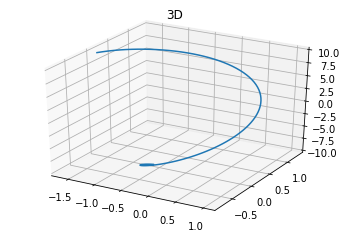

In [6]:
# defining all 3 axes 
n = np.linspace(-10, 10, 100) 
z=np.array([-2+3j ,2-3j,cm.rect(1,pi/10),cm.rect(0.95,pi/10),cm.rect(1.05,pi/10)])
for i in range(len(z)):
    fig = plt.figure() 
    # syntax for 3-D projection 
    ax = plt.axes(projection ='3d')
    x=np.zeros(100)
    y=np.zeros(100)
    for k in range(len(n)):
        P=(z[i])**n
        x=P.real
        y=P.imag
    ax.plot3D(x, y, n) 
    ax.set_title('3D')


    plt.show() 

Consider the system y[n] = 2x[n - 3], the input to this system is the
sequence zn where z belong to the sequences in the previous section (all
complex). Find the response of the system. Also nd the corresponding
eigen values of the response.

In [7]:
n=np.linspace(0,9,10)
Impulse_res=2*((n-3)==0)
print(Impulse_res) 

[0 0 0 2 0 0 0 0 0 0]


[ 0.        +0.j          0.        +0.j          0.        +0.j
 -4.        +6.j          4.        -6.j          1.90211303+0.61803399j
  1.80700738+0.58713229j  1.99721868+0.64893569j  0.        +0.j
  0.        +0.j          0.        +0.j          0.        +0.j
  0.        +0.j          0.        +0.j        ]


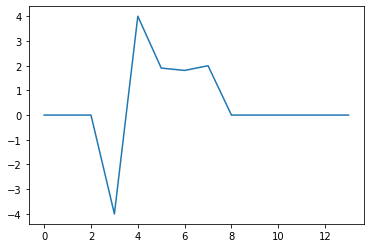

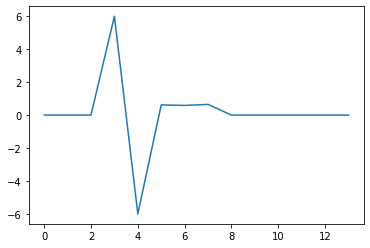

In [8]:
plt.figure()
z=np.array([-2+3j ,2-3j,cm.rect(1,pi/10),cm.rect(0.95,pi/10),cm.rect(1.05,pi/10)])
response=np.array(convolution(z,Impulse_res))
print(response)
p=np.linspace(0,13,14)
plt.plot(p,response.real)
plt.figure()
plt.plot(p,response.imag)

The eigen values of the response is the Z Transform of the impulse re-
sponse. This is also known as the transfer function denoted by H(z). Com-
pute the magnitude spectrum jH(z)j and the phase spectrum arg[H(z)]
and plot them in separate plots. Plot for the previous section by consid-
ering complex z values from last part.

Text(0, 0.5, 'Angle value in degree')

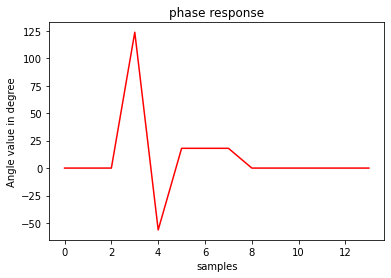

In [9]:
plt.figure()
plt.plot(np.angle(response)*180/np.pi,color="r")
plt.title("phase response")
plt.xlabel("samples")
plt.ylabel("Angle value in degree")

Compute the Z Transform for the basic signals: [n], u[n], r[n], nu[n],
nnu[n], rn cos !0nu[n]. Choose specic values for each and visualize the
magnitude and phase spectrums. Also plot the poles and zeros with the
ROC. For which values if any the Z Transform doesnot exist? Try nding
out the Z Transform outside the ROC.

In [111]:
z=sp.Symbol("z")
a=sp.Symbol("a")
u=sp.Symbol("u")
n=sp.Symbol("n")


#for (a^n)u(n-p)
def z_u(a,u,n,p):
    inp=a**n
    prod=inp*(z**n)
    CR=a*(z**-1)
    summ=((z**-p)*1/(1-CR))
    return summ
pprint(z_u(a,u,n,4))



# u(n)
z=sp.Symbol("z")
a=sp.Symbol("a")
# standard (a**n)u(n-p)
def z_trans_u(a,p):
    f=(z**-p)*1/(1-a*z**-1)
    return f
res=(z_u(1,u,n,0))
sp.pprint(res)




#stand del(n-p)
dell=((n-3)==0)

def z_del(a,dell,n,p):
    return a*(z**-p)
pprint(z_del(1,dell,n,3))


#del(n)
dell=((n-3)==0)
pprint(z_del(1,dell,n,0))




#ramp function
y=z_u(1,u,n,0)
z_ramp=sp.diff(y,z)
pprint(z_ramp)




z=sp.Symbol("z")
a=sp.Symbol("a")
u=sp.Symbol("u")
n=sp.Symbol("n")

# n*(a*n)u(n)=   n*(a*n)u(n)

y=z_u(a,u,n,0)
sp.diff(y,z)


     1      
────────────
 4 ⎛  a    ⎞
z ⋅⎜- ─ + 1⎟
   ⎝  z    ⎠
  1  
─────
    1
1 - ─
    z
1 
──
 3
z 
1
    -1     
───────────
          2
 2 ⎛    1⎞ 
z ⋅⎜1 - ─⎟ 
   ⎝    z⎠ 


-a/(z**2*(-a/z + 1)**2)

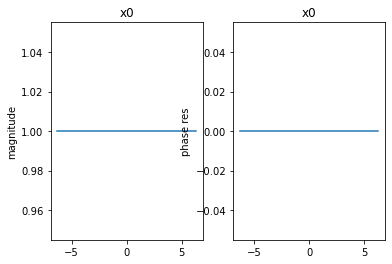

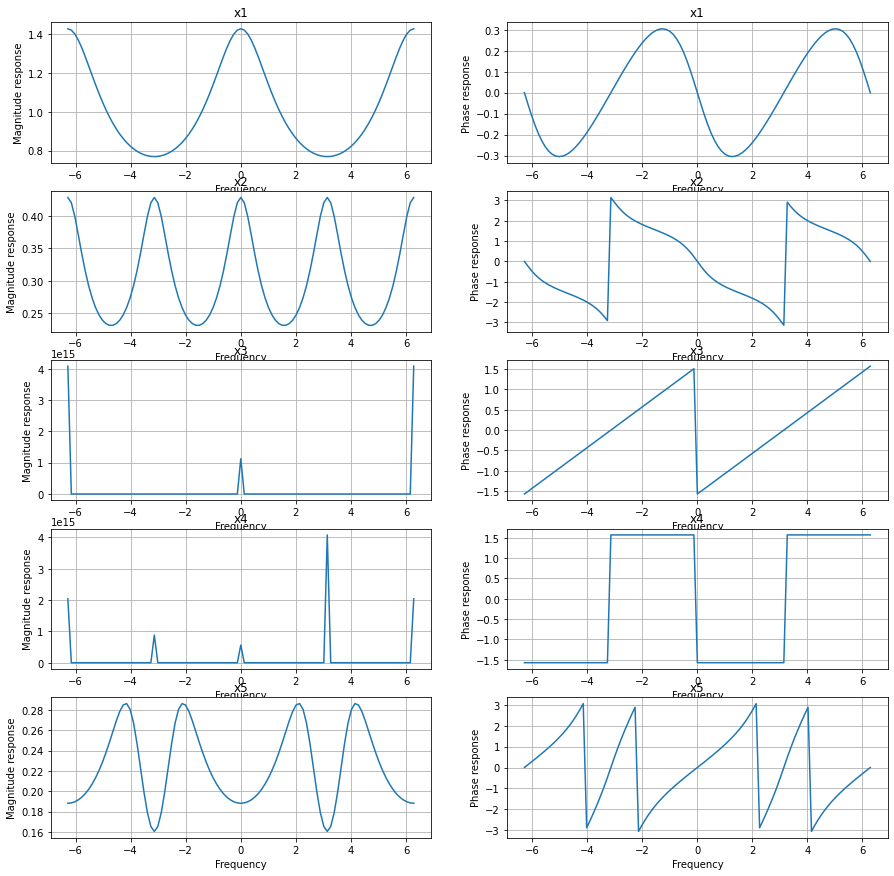

In [276]:
%matplotlib inline

omg = np.linspace(-2*pi,2*pi,101)
x1 = 1
x2 = 1/(1-0.3*np.exp(omg*-1j))
x3 = (0.3*np.exp(omg*-1j))/(1-0.3*np.exp(omg*-1j)**2)
x4 = 1/(1-(2*0.5*np.exp(omg*-1j)))
x5 = (2*0.5*np.exp(omg*-1j))/(1-2*0.5*np.exp(omg*-1j)**2)
x6 = (1 - 2*0.3*np.exp(omg*-1j)*cos(3))/(1 - 2*3*(0.5*np.exp(omg*-1j))*cos(3) + (3**(2))*(0.5*exp(omg*-1j)**2))
#plotting x1



plt.subplot(1,2,1)
mag = np.array([1]*len(omg))
phase = np.array([0]*len(omg))
plt.plot(omg,mag)
plt.title("x0")
plt.ylabel('magnitude')
plt.subplot(1,2,2)
plt.plot(omg,phase)
plt.title("x0")
plt.ylabel('phase res')
lst = [x2,x3,x4,x5,x6]






void, axs = plt.subplots(5, 2,figsize=(15,15))
for j in range(5):
    x = lst[j]
    lst_r = []
    lst_phi = []
    for i in range(len(omg)):
        r,phi = cm.polar(x[i])
        lst_r.append(r)
        lst_phi.append(phi)
    axs[j,0].plot(omg,lst_r)
    axs[j,0].grid("on")
    axs[j,0].set_title("x%d"%(j+1))
    axs[j,0].set_xlabel('Frequency')
    axs[j,0].set_ylabel('Magnitude response')
    axs[j,1].plot(omg,lst_phi)
    axs[j,1].set_title("x%d"%(j+1))
    axs[j,1].set_xlabel('Frequency')
    axs[j,1].set_ylabel('Phase response')
    axs[j,1].grid("on")

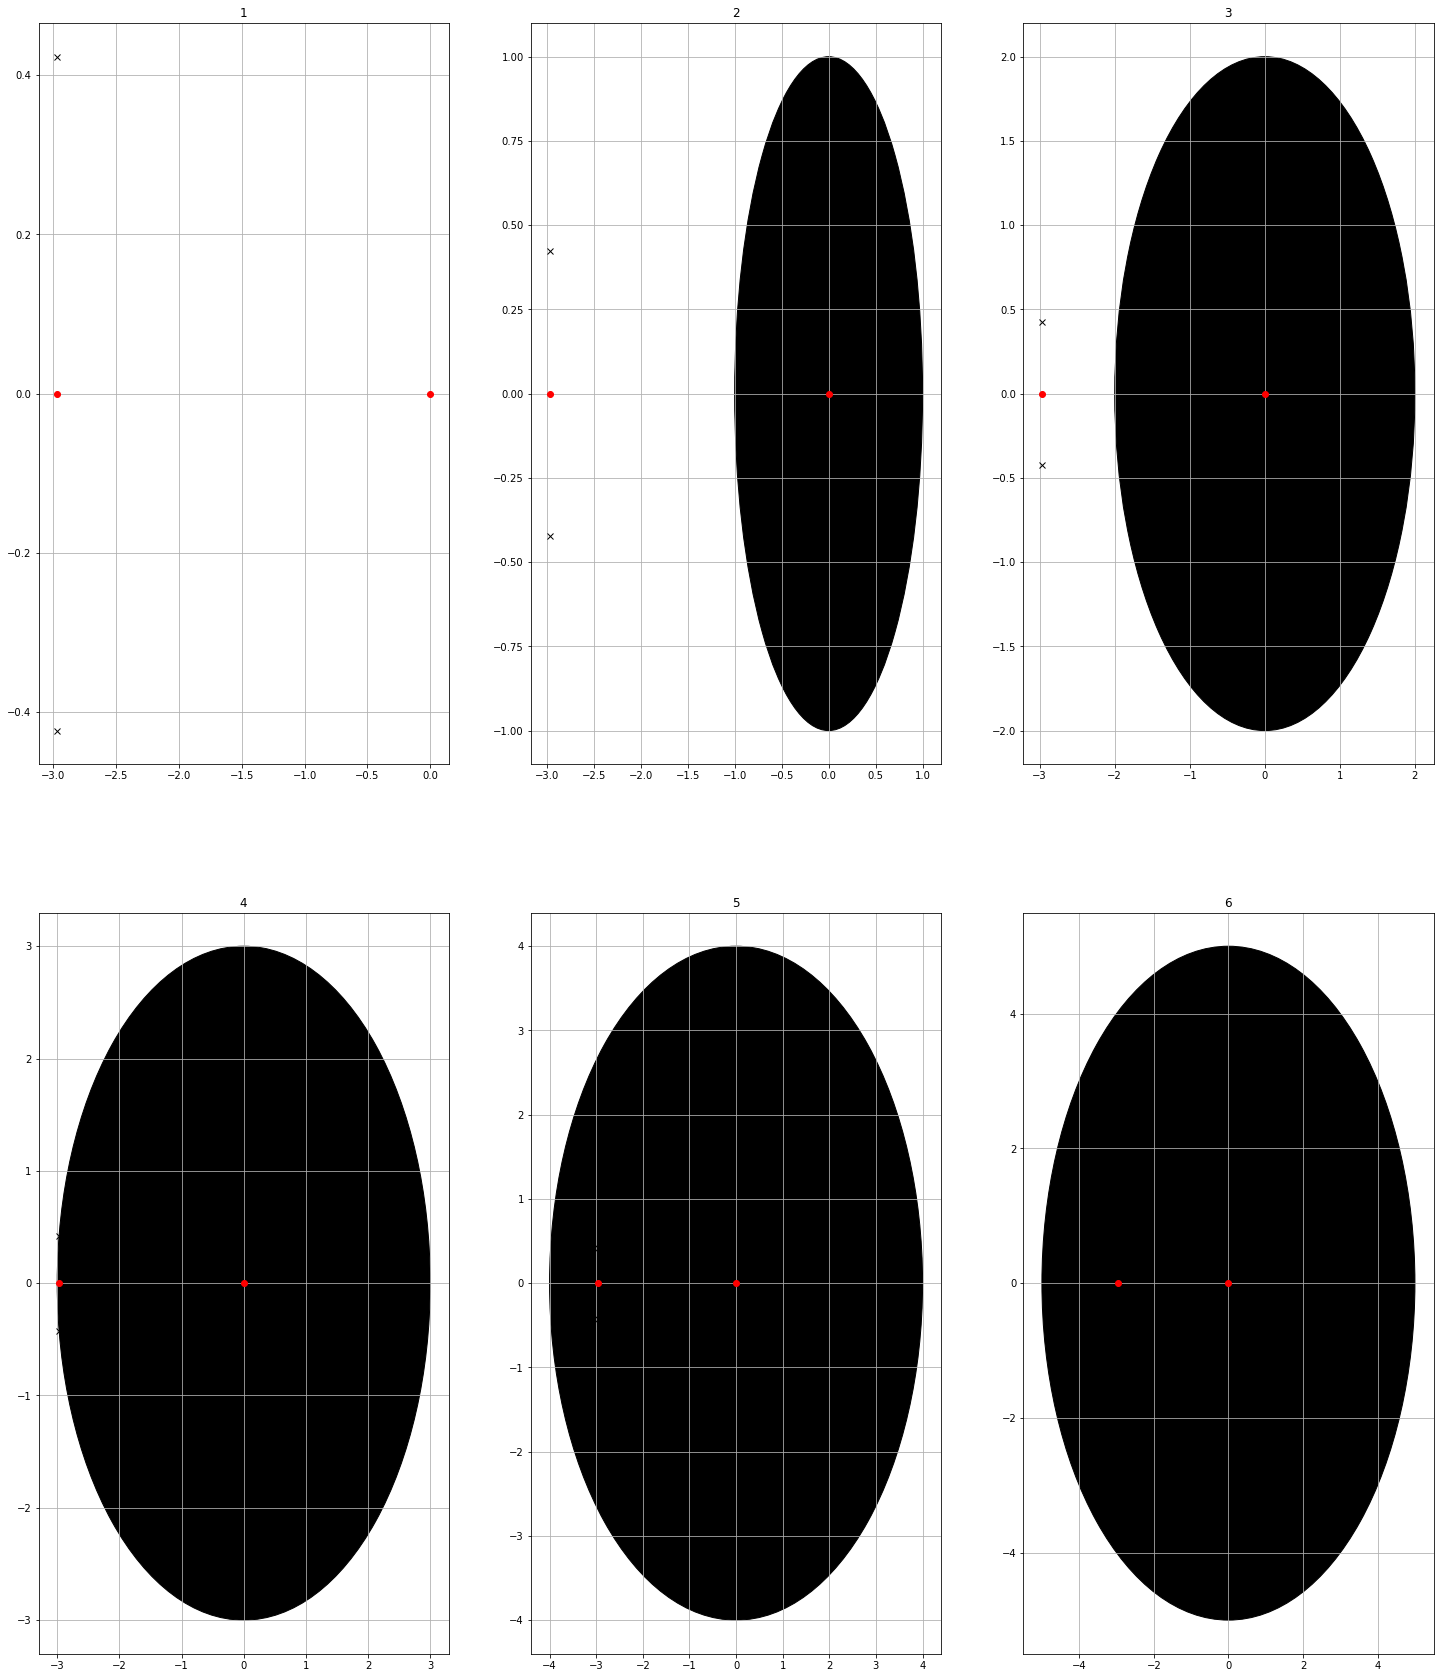

In [321]:
%matplotlib inline
fig, axs = plt.subplots(2,3,figsize=(25,30))
num = np.array([[], [], [1], [1], [3], [1,-3*np.cos(3),0]])
den = np.array([[100], [1,-1],[1,-2,1], [1,-3], [1,-6,9], [1,-6*np.cos(3),9]])




for i in range(6):
    n = np.roots(den[i])
    m = np.roots(num[i])
    plt.subplot(2,3,i+1)
    for j in range(len(p)):
        plt.plot(p[j].real, p[j].imag, 'x',color="k" )
    for j in range(len(z)):
        plt.plot(z[j].real, z[j].imag, 'o',color="red")

    plt.title((i+1))

    ax = fig.gca()
    circle1 = plt.Circle((0, 0), i, color='black',fill=True)
    ax.add_patch(circle1)
    plt.grid(True)

# Discrete Time Fourier Series: 
For a signal x[n] with fundamental
period N, the DTFS representation is as follows:
x[n] =
N
X−1
k=0
ake
jk(2π/N)n
The DTFS coefficients are defined by following relation:
x[n] = 1
N
N
X−1
n=0
x[n]e
−jk(2π/N)n
The DTFS coefficients of a periodic discrete time signal with period N = 5
are given below:
a0 = 1, a2 = a
∗
−2 = e
jπ/4
, a4 = a
∗
−4 = 2e
jπ/3
Using the properties of DTFS, determine the values of a0 through a4.
Using these coefficients, determine one period of the signal and display a
labelled plot.
Consider a periodic square wave with fundamental period N = 16 having
magnitude 1 between n = 0 and n = 7 and zero elsewhere. Make a plot
of this signal over two periods in blue colour.
Determine the DTFS coefficients of this signal and generate magnitude
plots of the coefficients.
Using the coefficients determined above, make an approximate reconstruction of the square wave and display it on the plot of the original signal in
red colour.

In [260]:
Period=5
a0=1
a2=np.cos(np.pi/4)+1j*np.sin(np.pi/4)
a_2n=a2
a4=2*(np.cos(np.pi/3)+1j*np.sin(np.pi/3))
a4n=a4
A=np.array([a0,0,a2,0,a4])
print(A)

[1.        +0.j         0.        +0.j         0.70710678+0.70710678j
 0.        +0.j         1.        +1.73205081j]


In [261]:
#finding out all coeffiecint


#since      C_k=C*_(-k) which means system is conjugate symmetric
#            in coeffienctient we have since and cosine both



n=np.arange(5)
sig=np.zeros(5)
for i in  n:
    for k in range(5):
        sig[i]=sig[i]+A[k]*np.exp(1j*k*2*np.pi*i/5)
        
print("the value of the signal")        
print(sig)

the value of the signal
[ 2.70710678  1.96860686  2.10006345 -1.28108142 -0.49469568]


In [262]:
pulse=[]
for i in range (2):
    z=[0,0,0,0,0,0,0,0]
    on=[1,1,1,1,1,1,1,1]
    pulse=pulse+on+z

<StemContainer object of 3 artists>

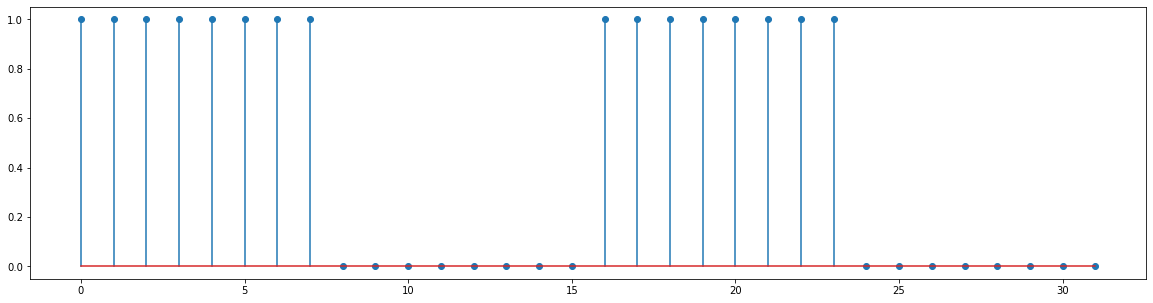

In [263]:
plt.figure(figsize=(20,5))
pulse=np.array(pulse)
plt.stem(pulse)

<StemContainer object of 3 artists>

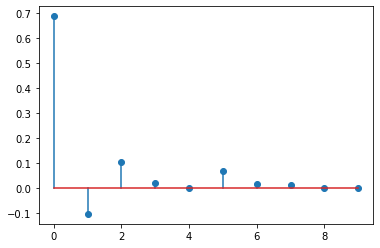

In [264]:
# DTFS coefficients of this signal and generate magnitudeplots of the coefficients
N=16
n=np.linspace(0,10,11)

coeff=np.zeros(10)
for k in range(0,10):
     coeff[k]=sum(pulse[k]*np.exp(-1j*k*2*np.pi*n/16)) /16 
coeff
plt.stem(coeff)

the value of the signal


array([ 0.14903127, -0.02209709,  0.02312839,  0.00439538,  0.        ,
        0.0147648 ,  0.0039682 ,  0.0029369 ,  0.        ,  0.        ])

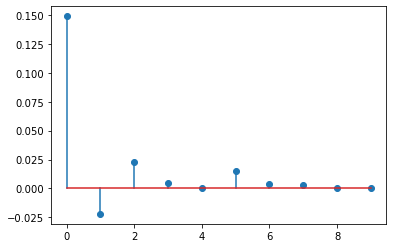

In [265]:
n=np.linspace(0,10,11)
sig=np.zeros(10)
for i in range(10):
    sig[i]=sum(coeff[i]*np.exp(k*2*(pi/16)*n*1j))
plt.stem(sig)
print("the value of the signal")        
sig

# Continuous Time Fourier Transform: 
Consider a rectangular signal
with amplitude 5 and existing between t = −1 and t = 1. Compute
the continuous time Fourier transform of this signal and display a nicely
labelled plot.
A message signal m(t) is used to modulate a carrier signal c(t) = cos2πfct
and the resultant signal is given by y(t) = m(t)c(t). Plot y(t).
Compute the Fourier transform of m(t) and y(t) and display the plots.
m(t) is a triangular signal existing between t = −1 and t = 1 with a peak
amplitude of 1.

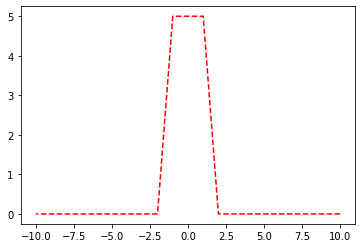

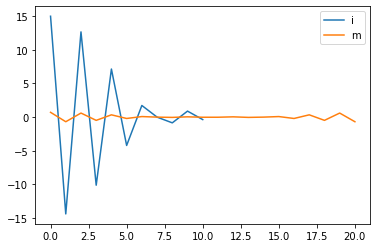

In [209]:
%matplotlib inline
t=-np.linspace(-10,10,21)
Rect=5*(abs(t)<=1)
plt.plot(t,Rect,"--r")
plt.figure()
plt.plot(np.fft.rfft(Rect))
plt.legend("real")
plt.plot(np.fft.ifft(Rect))
plt.legend("imag")


Text(0, 0.5, 'magnitude')

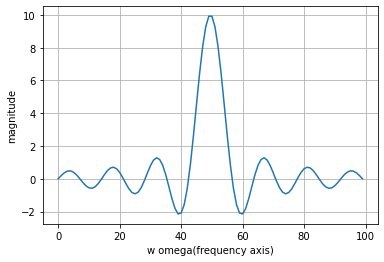

In [210]:
%matplotlib inline
w=np.linspace(-7*np.pi,7*np.pi,100)
fft=5*2*np.sin(w*2/2)/w
plt.plot(fft)
plt.grid()
plt.xlabel("w omega(frequency axis)")
plt.ylabel("magnitude")

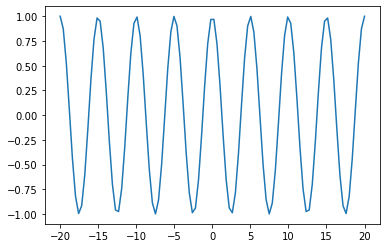

In [211]:
plt.figure()
t=np.linspace(-20,20,100)
fc=2000
Carr=np.cos(2*np.pi*fc*t)
plt.plot(t,Carr)

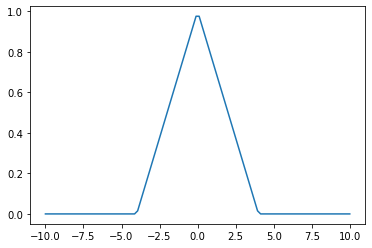

In [212]:
a=np.linspace(-10,10,100)
plt.figure()
tr=np.zeros(len(a))
for i in range (len(a)):
    if(abs(a[i])<=4):
        tr[i]=1-abs(a[i]/4)
plt.plot(a,tr)

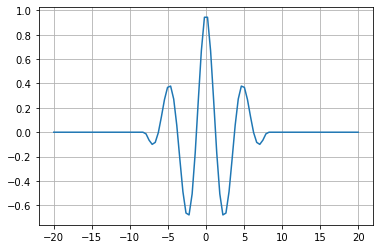

In [213]:
y=Carr*tr
plt.figure()
plt.plot(t,y)
plt.grid()

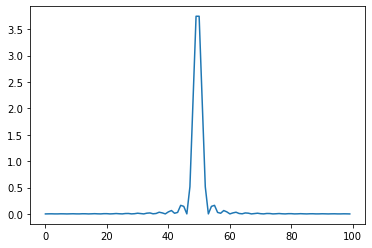

In [214]:
plt.figure()
tou=4
omg=np.linspace(-7*np.pi,7*np.pi,100)
fft_tr=1*4*(((sin(omg*4/2))/(omg*tou/2))**2)
plt.plot(fft_tr)


In [215]:
#multiplication in time doain is equal to convolution in frquency domain

In [216]:
# muttiplication in time domain and its fourier is equal to taking convolution of
#their fourier transfrom

<StemContainer object of 3 artists>

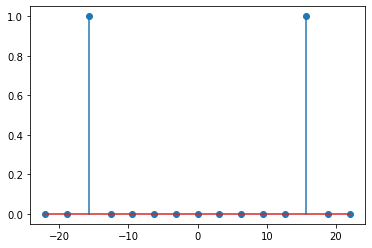

In [217]:
#fft of    coswt
w0=5*np.pi
w=np.linspace(-7*pi,7*pi,15)
plt.figure()
p=((w+w0)==0)
fft_cos=p+((w-w0)==0)
plt.stem(w,fft_cos)

<StemContainer object of 3 artists>

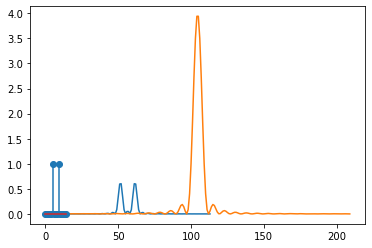

In [222]:
%matplotlib inline
plt.figure()
plt.plot(convolution(fft_tr,fft_cos)/(2*pi))

tou=4
omg=np.linspace(-7*pi,7*pi,210)
fft_tr=1*4*(((sin(omg*4/2))/(omg*tou/2))**2)
plt.plot(fft_tr)

w0=2*np.pi
w=np.linspace(-7*pi,7*pi,15)

p=((w+w0)==0)
fft_cos=p+((w-w0)==0)
plt.stem(fft_cos)

# bonus

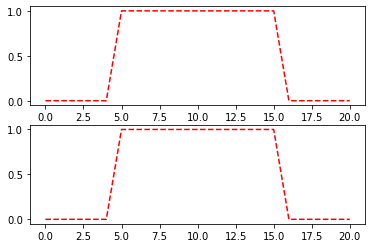

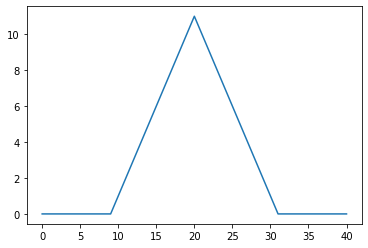

In [259]:
t=np.linspace(-10,10,21)
plt.subplot(2,1,1)
s1=(abs(t)<=5)
plt.plot(s1,"--r")
plt.subplot(2,1,2)
s2=(abs(t)<=5)
plt.plot(s2,"--r")
plt.figure()
sig=convolution(s1,s2)
plt.plot(sig)